## Capstone Project: Modelling Part 1: Electricity Consumption
- Now for the 1st part of the modelling. Will be looking at Electricity Consumption and predicting future Consumption

In [2]:
#import libraries that will be needed first. to add more as needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [8]:
#import the processed data from EDA earlier
electricity = pd.read_csv('./electricity_annual.csv')

In [9]:
#change to datetime
electricity['date'] = pd.to_datetime(electricity['date'])

In [10]:
#set freq to be years
electricity = electricity.set_index("date")
electricity = electricity.sort_index()
electricity = electricity.asfreq("YS")
electricity

,electricity_generation_GWh,electricity_consumption_GWh,gdp_thousands_usd,Year
date,,,,
2005-01-01,38212.7,35489.3,245134.6,2005
2006-01-01,39480.4,36801.8,267213.3,2006
2007-01-01,41134.1,38304.9,291320.0,2007
2008-01-01,41670.3,38986.9,296748.7,2008
2009-01-01,41800.6,38822.9,297128.4,2009
2010-01-01,45366.5,42251.8,340270.7,2010
2011-01-01,45999.4,43007.1,361418.3,2011
2012-01-01,46936.2,44200.7,377449.0,2012
2013-01-01,47963.5,44948.8,395633.1,2013


In [ ]:
#split time series into train-test, 2013 - 2022 for train, 2023-2024 for test
train = electricity['electricity_consumption_GWh'].loc['2013':'2022']
test = electricity['electricity_consumption_GWh'].loc['2023':'2024']

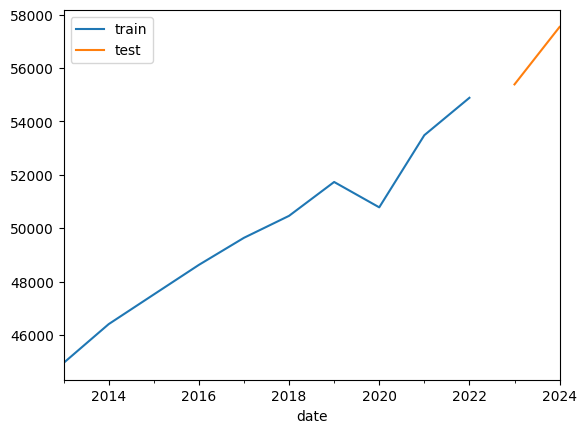

In [12]:
train.plot(label="train")
test.plot(label="test")
plt.legend()

plt.show()

In [ ]:
#hyperparameter tuning for the optimal p, d, q for ARIMA from 0-3. this is to test for best RMSE

warnings.filterwarnings("ignore")

p = range(0, 4)
d = range(0, 4)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_rmse = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        # Forecast for length of test set
        forecast = model_fit.forecast(steps=len(test))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test, forecast))

        print(f"Tested ARIMA{order} - RMSE: {rmse:.3f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")
        continue

print(f"\nBest order by RMSE: {best_order} with RMSE: {best_rmse:.3f}")

Tested ARIMA(0, 0, 0) - RMSE: 6704.535
Tested ARIMA(0, 0, 1) - RMSE: 6184.630
Tested ARIMA(0, 0, 2) - RMSE: 6039.460
Tested ARIMA(0, 0, 3) - RMSE: 3387.295
Tested ARIMA(0, 1, 0) - RMSE: 1911.466
Tested ARIMA(0, 1, 1) - RMSE: 1856.880
Tested ARIMA(0, 1, 2) - RMSE: 1729.530
Tested ARIMA(0, 1, 3) - RMSE: 1695.375
Tested ARIMA(0, 2, 0) - RMSE: 644.550
Tested ARIMA(0, 2, 1) - RMSE: 656.687
Tested ARIMA(0, 2, 2) - RMSE: 634.457
Tested ARIMA(0, 2, 3) - RMSE: 637.050
Tested ARIMA(0, 3, 0) - RMSE: 2673.638
Tested ARIMA(0, 3, 1) - RMSE: 854.155
Tested ARIMA(0, 3, 2) - RMSE: 924.041
Tested ARIMA(0, 3, 3) - RMSE: 641.182
Tested ARIMA(1, 0, 0) - RMSE: 2323.632
Tested ARIMA(1, 0, 1) - RMSE: 2324.341
Tested ARIMA(1, 0, 2) - RMSE: 1407.153
Tested ARIMA(1, 0, 3) - RMSE: 1003.030
Tested ARIMA(1, 1, 0) - RMSE: 1842.770
Tested ARIMA(1, 1, 1) - RMSE: 535.716
Tested ARIMA(1, 1, 2) - RMSE: 721.478
Tested ARIMA(1, 1, 3) - RMSE: 548.722
Tested ARIMA(1, 2, 0) - RMSE: 664.305
Tested ARIMA(1, 2, 1) - RMSE: 855.77

In [ ]:
#hyperparameter tuning for the optimal p, d, q for ARIMA from 0-3. this is to test for best AIC
p = range(0, 4)
d = range(0, 4)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        aic = model_fit.aic
        print(f"Tested ARIMA{order} - AIC: {aic:.2f}")

        if aic < best_aic:
            best_aic = aic
            best_order = order
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")
        continue

print(f"\nBest order by AIC: {best_order} with AIC: {best_aic:.2f}")

Tested ARIMA(0, 0, 0) - AIC: 192.08
Tested ARIMA(0, 0, 1) - AIC: 186.47
Tested ARIMA(0, 0, 2) - AIC: 187.18
Tested ARIMA(0, 0, 3) - AIC: 186.52
Tested ARIMA(0, 1, 0) - AIC: 158.16
Tested ARIMA(0, 1, 1) - AIC: 158.82
Tested ARIMA(0, 1, 2) - AIC: 160.01
Tested ARIMA(0, 1, 3) - AIC: 161.18
Tested ARIMA(0, 2, 0) - AIC: 142.69
Tested ARIMA(0, 2, 1) - AIC: 144.89
Tested ARIMA(0, 2, 2) - AIC: 146.66
Tested ARIMA(0, 2, 3) - AIC: 149.08
Tested ARIMA(0, 3, 0) - AIC: 134.36
Tested ARIMA(0, 3, 1) - AIC: 130.64
Tested ARIMA(0, 3, 2) - AIC: 132.32
Tested ARIMA(0, 3, 3) - AIC: 134.80
Tested ARIMA(1, 0, 0) - AIC: 181.65
Tested ARIMA(1, 0, 1) - AIC: 182.93
Tested ARIMA(1, 0, 2) - AIC: 184.27
Tested ARIMA(1, 0, 3) - AIC: 184.95
Tested ARIMA(1, 1, 0) - AIC: 158.70
Tested ARIMA(1, 1, 1) - AIC: 154.16
Tested ARIMA(1, 1, 2) - AIC: 374.28
Tested ARIMA(1, 1, 3) - AIC: 158.57
Tested ARIMA(1, 2, 0) - AIC: 146.35
Tested ARIMA(1, 2, 1) - AIC: 146.58
Tested ARIMA(1, 2, 2) - AIC: 148.59
Tested ARIMA(1, 2, 3) - AIC:

In [89]:
#test both recommended hyperparameters to find the best model.
model = ARIMA(train, order=(3, 1, 3)).fit()

y_pred = model.predict(start="2023-01-01", end="2024-01-01")

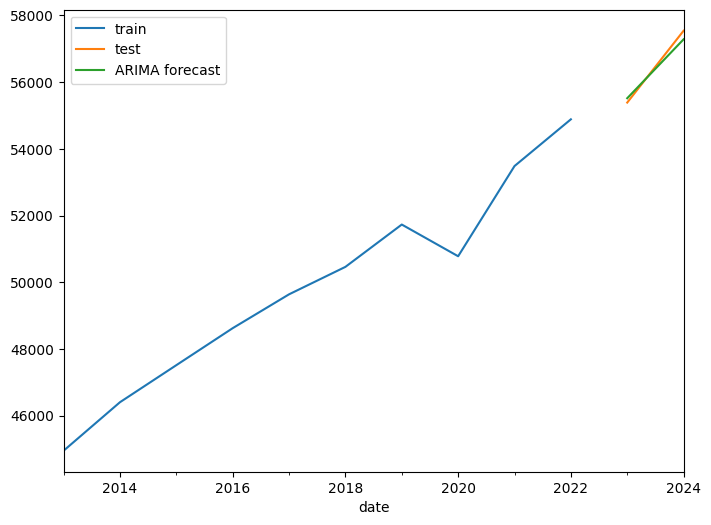

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))

train.plot(label="train")
test.plot(label="test")
y_pred.plot( label="ARIMA forecast")
plt.legend()

plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(test, y_pred))
print(f'RMSE: {rmse}')
print(f'AIC: {model.aic}')

RMSE: 204.14675490774368
AIC: 158.34080894739023


In [ ]:
model = ARIMA(train, order=(0, 3, 1)).fit()

y_pred = model.predict(start="2023-01-01", end="2024-01-01")

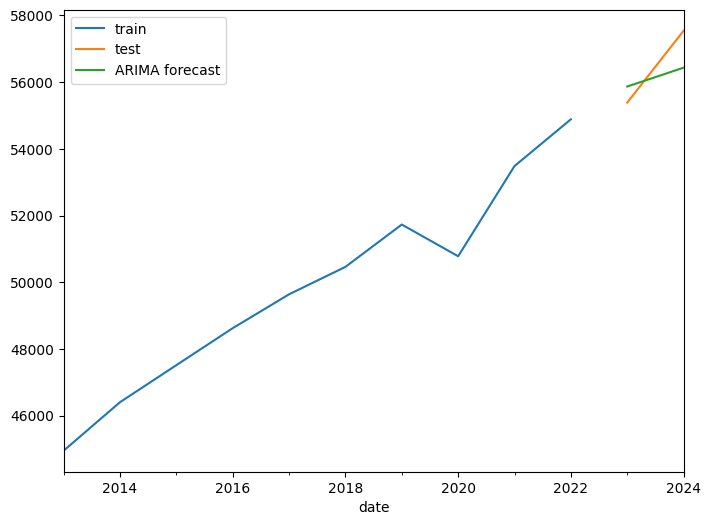

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

train.plot(label="train")
test.plot(label="test")
y_pred.plot( label="ARIMA forecast")
plt.legend()

plt.show()

### We can notice immediately that 1st model performed better

- and now to use the 1st model to predict 2025 and 2026 consumption

In [13]:
model = ARIMA(electricity['electricity_consumption_GWh'].loc['2013':'2024'], order=(3, 1, 3)).fit()

#predict for up to 2026.
y2_pred = model.predict(start="2025-01-01", end="2026-01-01")

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


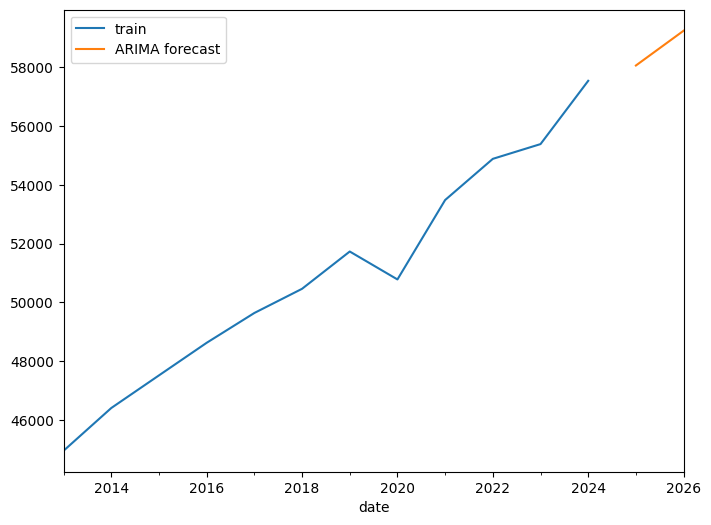

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

electricity['electricity_consumption_GWh'].loc['2013':'2024'].plot(label="train")
y2_pred.plot( label="ARIMA forecast")
plt.legend()

plt.show()

In [15]:
print(f'AIC: {model.aic}')

AIC: 189.94738463644484


In [16]:
y2_pred

2025-01-01    58062.262106
2026-01-01    59246.364789
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [17]:
cons_pred = pd.concat([electricity, y2_pred])

In [18]:
cons_pred.rename(columns={'predicted_mean': 'predicted_electricity_consumption'}, inplace=True)

In [ ]:
#save to csv
cons_pred.to_csv('predicted_consumption.csv')

### Now to test for linear regression as well

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
X_train = pd.DataFrame(electricity["Year"].loc['2013':'2022'])
X_test = pd.DataFrame(electricity["Year"].loc['2023':'2024'])
y_train = electricity["electricity_consumption_GWh"].loc['2013':'2022']
y_test = electricity["electricity_consumption_GWh"].loc['2023':'2024']

In [77]:
lr = LinearRegression()

lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
y_pred = lr.predict(X_test)

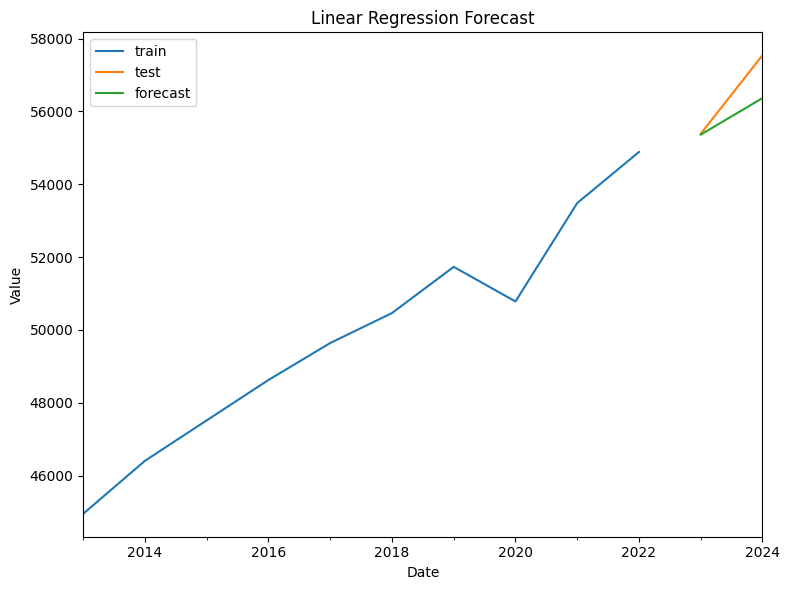

In [85]:
y_pred = pd.Series(y_pred, index=y_test.index)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot on the same axes
y_train.plot(ax=ax, label="train")
y_test.plot(ax=ax, label="test")
y_pred.plot(ax=ax, label="forecast")

ax.set_title("Linear Regression Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()

plt.tight_layout()
plt.show()

In [86]:

model_rmse = metrics.root_mean_squared_error(y_test, y_pred)
model_rmse

832.0686802003398

In [87]:
r2 = r2_score(y_test, y_pred)
r2

0.4032309403875529

### ARIMA model still performed better hence we stick to ARIMA model

## Capstone Project: Modelling Part 2: Peak System Demand
- Now that we know that consumption is projected to increase, we should look at peak system demand as it affects the capacity required.

In [3]:
#import data
demand_capacity = pd.read_csv('./peakdemand_capacity.csv')

In [4]:
demand_capacity.head()

,Unnamed: 0,Date,peak_system_demand_mw,outage_capacity_MW,remaining_capacity_MW,total_capacity_MW,percentage_capacity_available,lowest_scenario_capacity_MW,peak_demand_lowest_capacity_ratio,peak_demand_remaining_capacity_ratio
0,0,1/1/2009,5488,2195,8462.0,10657.0,0.7940,7849.95,0.6991,0.6485
1,1,1/2/2009,5629,2146,8261.0,10407.0,0.7938,7665.80,0.7343,0.6814
2,2,1/3/2009,5482,1541,8866.0,10407.0,0.8519,7665.80,0.7151,0.6183
3,3,1/4/2009,5806,1813,8594.0,10407.0,0.8258,7665.80,0.7574,0.6756
4,4,1/5/2009,5926,1605,8802.0,10407.0,0.8458,7665.80,0.7730,0.6733


In [5]:
demand_capacity.drop(columns='Unnamed: 0', inplace=True)

In [6]:
#change date column to datetime format, set as index, and resample into monthly frequency
demand_capacity['Date'] = pd.to_datetime(demand_capacity['Date'],format='%d/%m/%Y')
demand_capacity = demand_capacity.set_index('Date')
demand_capacity.resample("MS")

In [7]:
demand_capacity.head()

,peak_system_demand_mw,outage_capacity_MW,remaining_capacity_MW,total_capacity_MW,percentage_capacity_available,lowest_scenario_capacity_MW,peak_demand_lowest_capacity_ratio,peak_demand_remaining_capacity_ratio
Date,,,,,,,,
2009-01-01,5488,2195,8462.0,10657.0,0.7940,7849.95,0.6991,0.6485
2009-02-01,5629,2146,8261.0,10407.0,0.7938,7665.80,0.7343,0.6814
2009-03-01,5482,1541,8866.0,10407.0,0.8519,7665.80,0.7151,0.6183
2009-04-01,5806,1813,8594.0,10407.0,0.8258,7665.80,0.7574,0.6756
2009-05-01,5926,1605,8802.0,10407.0,0.8458,7665.80,0.7730,0.6733


### Split into train and test data

In [8]:
demand_train = demand_capacity['peak_system_demand_mw']["2014":"2023"] #from 2014 to 2023 for train
demand_test = demand_capacity['peak_system_demand_mw']["2024":"2025"] #2024 to 2025 for test

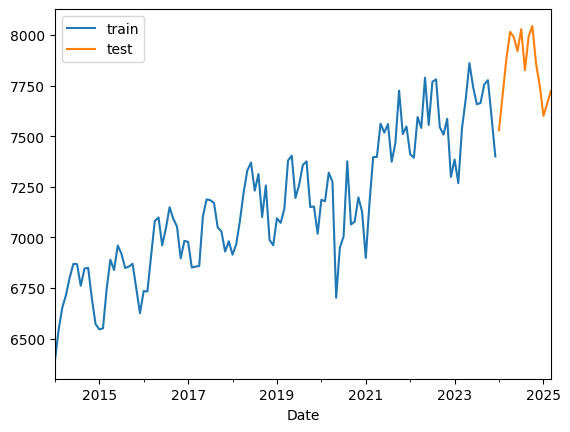

In [9]:
demand_train.plot(label="train")
demand_test.plot(label="test")
plt.legend()

plt.show()

In [ ]:
#test for best p d q value from 0-3 for best rmse

p = range(0, 4)
d = range(0, 4)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_rmse = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(demand_train, order=order)
        model_fit = model.fit()

        # forecast for length of test set
        forecast = model_fit.forecast(steps=len(demand_test))

        # calculate rmse
        rmse = np.sqrt(mean_squared_error(demand_test, forecast))

        print(f"Tested ARIMA{order} - RMSE: {rmse:.3f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")
        continue
#print the best rmse
print(f"\nBest order by RMSE: {best_order} with RMSE: {best_rmse:.3f}")

Tested ARIMA(0, 0, 0) - RMSE: 696.966
Tested ARIMA(0, 0, 1) - RMSE: 696.946
Tested ARIMA(0, 0, 2) - RMSE: 694.339
Tested ARIMA(0, 0, 3) - RMSE: 692.701
Tested ARIMA(0, 1, 0) - RMSE: 464.414
Tested ARIMA(0, 1, 1) - RMSE: 427.250
Tested ARIMA(0, 1, 2) - RMSE: 375.333
Tested ARIMA(0, 1, 3) - RMSE: 312.915
Tested ARIMA(0, 2, 0) - RMSE: 2135.602
Tested ARIMA(0, 2, 1) - RMSE: 398.192
Tested ARIMA(0, 2, 2) - RMSE: 364.143
Tested ARIMA(0, 2, 3) - RMSE: 309.884
Tested ARIMA(0, 3, 0) - RMSE: 2526.169
Tested ARIMA(0, 3, 1) - RMSE: 2421.107
Tested ARIMA(0, 3, 2) - RMSE: 471.811
Tested ARIMA(0, 3, 3) - RMSE: 484.207
Tested ARIMA(1, 0, 0) - RMSE: 596.584
Tested ARIMA(1, 0, 1) - RMSE: 536.060
Tested ARIMA(1, 0, 2) - RMSE: 494.506
Tested ARIMA(1, 0, 3) - RMSE: 342.157
Tested ARIMA(1, 1, 0) - RMSE: 441.192
Tested ARIMA(1, 1, 1) - RMSE: 334.587
Tested ARIMA(1, 1, 2) - RMSE: 332.032
Tested ARIMA(1, 1, 3) - RMSE: 319.686
Tested ARIMA(1, 2, 0) - RMSE: 2112.529
Tested ARIMA(1, 2, 1) - RMSE: 376.405
Tested A

In [13]:
#now likewise for best AIC
p = range(0, 4)
d = range(0, 4)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(demand_train, order=order)
        model_fit = model.fit()

        aic = model_fit.aic
        print(f"Tested ARIMA{order} - AIC: {aic:.2f}")

        if aic < best_aic:
            best_aic = aic
            best_order = order
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")
        continue

print(f"\nBest order by AIC: {best_order} with AIC: {best_aic:.2f}")

Tested ARIMA(0, 0, 0) - AIC: 1734.86
Tested ARIMA(0, 0, 1) - AIC: 1647.41
Tested ARIMA(0, 0, 2) - AIC: 1595.94
Tested ARIMA(0, 0, 3) - AIC: 1585.48
Tested ARIMA(0, 1, 0) - AIC: 1528.37
Tested ARIMA(0, 1, 1) - AIC: 1527.34
Tested ARIMA(0, 1, 2) - AIC: 1528.19
Tested ARIMA(0, 1, 3) - AIC: 1522.80
Tested ARIMA(0, 2, 0) - AIC: 1614.13
Tested ARIMA(0, 2, 1) - AIC: 1525.42
Tested ARIMA(0, 2, 2) - AIC: 1524.80
Tested ARIMA(0, 2, 3) - AIC: 1525.71
Tested ARIMA(0, 3, 0) - AIC: 1734.48
Tested ARIMA(0, 3, 1) - AIC: 1609.34
Tested ARIMA(0, 3, 2) - AIC: 1527.36
Tested ARIMA(0, 3, 3) - AIC: 1528.70
Tested ARIMA(1, 0, 0) - AIC: 1542.35
Tested ARIMA(1, 0, 1) - AIC: 1542.78
Tested ARIMA(1, 0, 2) - AIC: 1544.42
Tested ARIMA(1, 0, 3) - AIC: 1540.14
Tested ARIMA(1, 1, 0) - AIC: 1527.75
Tested ARIMA(1, 1, 1) - AIC: 1522.15
Tested ARIMA(1, 1, 2) - AIC: 1524.11
Tested ARIMA(1, 1, 3) - AIC: 1524.63
Tested ARIMA(1, 2, 0) - AIC: 1573.13
Tested ARIMA(1, 2, 1) - AIC: 1525.14
Tested ARIMA(1, 2, 2) - AIC: 1514.81
T

In [ ]:
#optimal hyperparameters for both lowest RMSE and AIC are the same. now to train model using the hyperparameters.
model = ARIMA(demand_train, order=(1, 2, 2)).fit()
#use the model to predict the test data period
y_pred = model.predict(start="2024-01-01", end="2025-03-01")

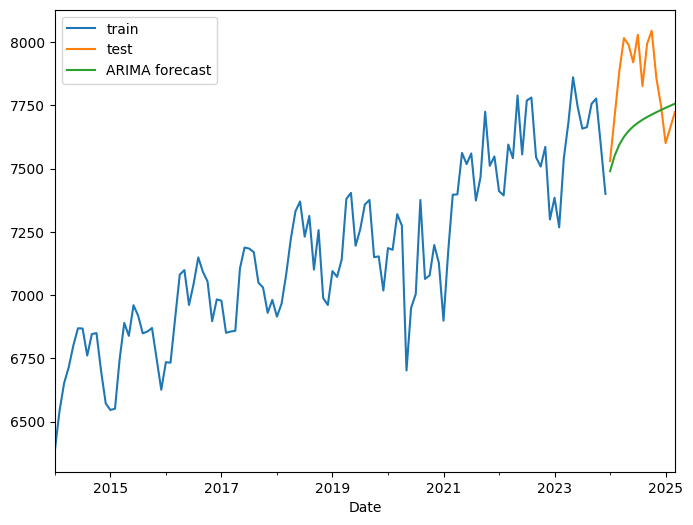

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))

demand_train.plot(label="train")
demand_test.plot(label="test")
y_pred.plot( label="ARIMA forecast")
plt.legend()

plt.show()

In [113]:
rmse = np.sqrt(mean_squared_error(demand_test, y_pred))
print(f'RMSE: {rmse}')
print(f'AIC: {model.aic}')

RMSE: 234.10869428561497
AIC: 1514.8062854312807


### ARIMA model does not seem to work well. This was expected as there is likely seasonality within electricity consumption. Hence to try SARIMA instead.

In [ ]:
#import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

#As usual, first find hyerparameters for best RMSE
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  #seasonality = 12 as it is monthly data

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q))

best_rmse = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal in seasonal_pdq:
        try:
            seasonal_order = seasonal + (s,)
            model = SARIMAX(demand_train,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)

            forecast = model_fit.forecast(steps=len(demand_test))
            rmse = np.sqrt(mean_squared_error(demand_test, forecast))

            print(f"SARIMA{order}x{seasonal_order} - RMSE: {rmse:.3f}")

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order
                best_seasonal_order = seasonal_order
        except Exception as e:
            print(f"SARIMA{order}x{seasonal + (s,)} failed: {e}")
            continue

print(f"\nBest SARIMA order: {best_order} x {best_seasonal_order} with RMSE: {best_rmse:.3f}")

SARIMA(0, 0, 0)x(0, 0, 0, 12) - RMSE: 7837.381
SARIMA(0, 0, 0)x(0, 0, 1, 12) - RMSE: 5478.255
SARIMA(0, 0, 0)x(0, 1, 0, 12) - RMSE: 284.375
SARIMA(0, 0, 0)x(0, 1, 1, 12) - RMSE: 290.077
SARIMA(0, 0, 0)x(1, 0, 0, 12) - RMSE: 178.980
SARIMA(0, 0, 0)x(1, 0, 1, 12) - RMSE: 142.234
SARIMA(0, 0, 0)x(1, 1, 0, 12) - RMSE: 287.897
SARIMA(0, 0, 0)x(1, 1, 1, 12) - RMSE: 286.144
SARIMA(0, 0, 1)x(0, 0, 0, 12) - RMSE: 7670.404
SARIMA(0, 0, 1)x(0, 0, 1, 12) - RMSE: 5258.643
SARIMA(0, 0, 1)x(0, 1, 0, 12) - RMSE: 280.279
SARIMA(0, 0, 1)x(0, 1, 1, 12) - RMSE: 300.828
SARIMA(0, 0, 1)x(1, 0, 0, 12) - RMSE: 180.544
SARIMA(0, 0, 1)x(1, 0, 1, 12) - RMSE: 154.972
SARIMA(0, 0, 1)x(1, 1, 0, 12) - RMSE: 291.610
SARIMA(0, 0, 1)x(1, 1, 1, 12) - RMSE: 288.289
SARIMA(0, 0, 2)x(0, 0, 0, 12) - RMSE: 7483.154
SARIMA(0, 0, 2)x(0, 0, 1, 12) - RMSE: 5126.583
SARIMA(0, 0, 2)x(0, 1, 0, 12) - RMSE: 273.528
SARIMA(0, 0, 2)x(0, 1, 1, 12) - RMSE: 317.318
SARIMA(0, 0, 2)x(1, 0, 0, 12) - RMSE: 177.212
SARIMA(0, 0, 2)x(1, 0, 1, 12

In [46]:
#now for AIC
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q))

best_aic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(demand_train,
                            order=order,
                            seasonal_order=(seasonal_order[0], seasonal_order[1], seasonal_order[2], s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)

            aic = model_fit.aic
            print(f"Tested SARIMA{order}x{seasonal_order + (s,)} - AIC: {aic:.2f}")

            if aic < best_aic:
                best_aic = aic
                best_order = order
                best_seasonal_order = seasonal_order + (s,)
        except Exception as e:
            print(f"SARIMA{order}x{seasonal_order + (s,)} failed: {e}")
            continue

print(f"\nBest SARIMA order: {best_order} x {best_seasonal_order} with AIC: {best_aic:.2f}")

Tested SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 2452.63
Tested SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 2138.18
Tested SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 1466.73
Tested SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 1311.28
Tested SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 1460.14
Tested SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 1418.24
Tested SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 1324.05
Tested SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 1306.18
Tested SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 2348.88
Tested SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 1931.92
Tested SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: 1426.60
Tested SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 1268.59
Tested SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: 1440.32
Tested SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: 1376.13
Tested SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: 1292.50
Tested SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: 1266.40
Tested SARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC: 2128.48
Tested SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC: 1839.13
Tested SARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC: 1404.70
Tested SARIM

In [114]:
#try out the hyperparamters for best rmse
seasonal_model = SARIMAX(demand_train,
                         order=(0, 0, 0),
                         seasonal_order=(1, 0, 1, 12),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit()

y_pred_seasonal = seasonal_model.predict(start="2024-01-01", end="2025-03-01")

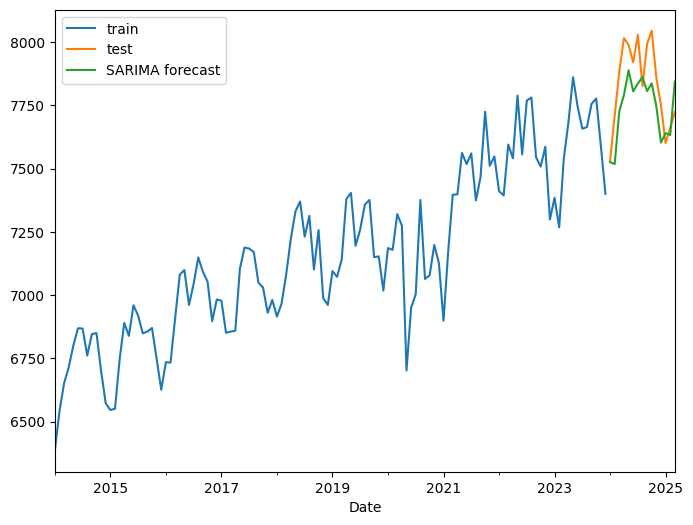

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))

demand_train.plot(label="train")
demand_test.plot(label="test")
y_pred_seasonal.plot( label="SARIMA forecast")
plt.legend()

plt.show()

In [116]:
rmse = np.sqrt(mean_squared_error(demand_test, y_pred_seasonal))
print(f'RMSE: {rmse}')
print(f'AIC: {seasonal_model.aic}')

RMSE: 142.2344689494007
AIC: 1418.2448104246491


In [117]:
#now for best AIC
seasonal_model = SARIMAX(demand_train,
                         order=(1, 2, 2),
                         seasonal_order=(0, 1, 1, 12),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit()

y_pred_seasonal = seasonal_model.predict(start="2024-01-01", end="2025-03-01")

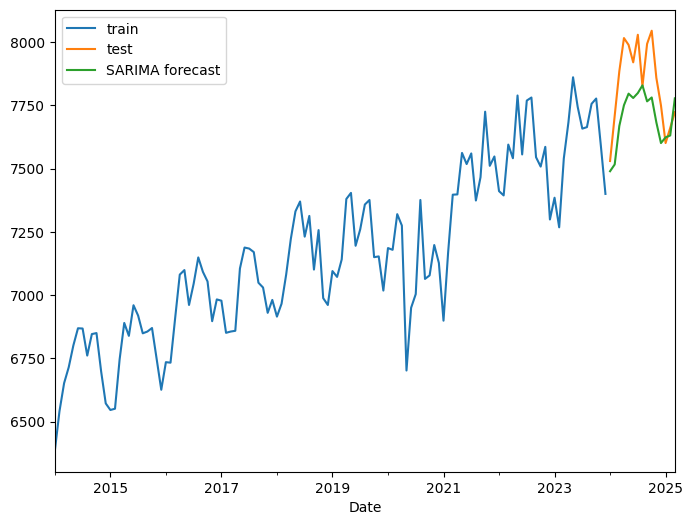

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))

demand_train.plot(label="train")
demand_test.plot(label="test")
y_pred_seasonal.plot( label="SARIMA forecast")
plt.legend()

plt.show()

In [119]:
rmse = np.sqrt(mean_squared_error(demand_test, y_pred_seasonal))
print(f'RMSE: {rmse}')
print(f'AIC: {seasonal_model.aic}')

RMSE: 172.1959631876326
AIC: 1178.7249108956323


### Seems like 2st model performed best, so let's use that to predict future demand

In [199]:
#now to try with predicting for rest of 2025 using the full set of data on same hyperparameters.

seasonal_model = SARIMAX(demand_capacity['peak_system_demand_mw']["2014":"2025"],
                         order=(1, 2, 2),
                         seasonal_order=(0, 1, 1, 12),
                         enforce_stationarity=False,
                         enforce_invertibility=False).fit()

y_pred_seasonal = seasonal_model.predict(start="2025-04-01", end="2029-12-01")

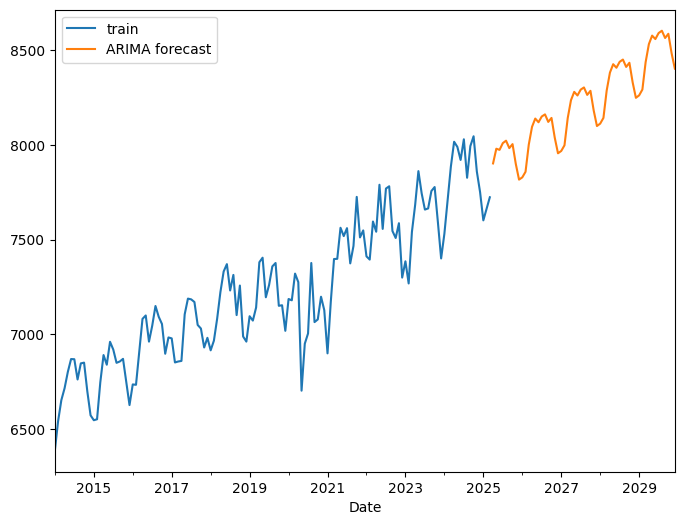

In [200]:
fig, ax = plt.subplots(figsize=(8, 6))

demand_capacity['peak_system_demand_mw']["2014":"2025"].plot(label="train")
y_pred_seasonal.plot( label="ARIMA forecast")
plt.legend()

plt.show()

In [201]:
print(f'AIC: {seasonal_model.aic}')

AIC: 1365.057340787715


## Now to find out the recommended capacity

In [202]:
predicted_demand = pd.DataFrame(y_pred_seasonal)

In [203]:
max_value = y_pred_seasonal.max()
max_date = y_pred_seasonal.idxmax()
print(f"Max predicted demand: {max_value} on {max_date}")

Max predicted demand: 8602.174482567569 on 2029-08-01 00:00:00


In [204]:
#current worst-case lowest capacity
demand_capacity['lowest_scenario_capacity_MW']['2025-03-01']

np.float64(9426.56)

In [206]:
#max predicted demand of this decade as a ratio to current worst-case lowest capacity
print(f'projected max peak demand of this decade is {y_pred_seasonal.max()/demand_capacity['lowest_scenario_capacity_MW']['2025-03-01']*100:.2f}% of current worst-case lowest capacity.')

projected max peak demand of this decade is 91.25% of current worst-case lowest capacity.


In [207]:
#based on optimal electricity generation of 70% load, to find the recommended available capacity.
pred_max = y_pred_seasonal.max()/0.7

In [ ]:
#To aim for 70% load (generator efficiency) at median available capacity.
pct_med = demand_capacity['percentage_capacity_available']['2014':'2025'].median()

In [218]:
demand_capacity['percentage_capacity_available']['2014':'2025'].median()

np.float64(0.8522)

In [210]:
print(f'We should hence aim for a total capacity of {pred_max/(pct_med):.2f} MWh by Aug 2029')

We should hence aim for a total capacity of 14420.11 MWh by Aug 2029


In [211]:
print(f'This means that we would need to increase current total capacity by {(pred_max/(pct_med)/demand_capacity['total_capacity_MW']['2025-03-01']-1)*100:.2f} % by Aug 2029')

This means that we would need to increase current total capacity by 12.68 % by Aug 2029


### based on the predicteed max peak demand of 8602 MW by 2030, to operate at a 70% load when accounting for the median remaining capacity, it is recommended to have a total capacity of 14,420MW by Aug 2029.
#### The represents a 12.68% increase in total capacity compared to that of March 2025.

In [212]:
demand_capacity = demand_capacity['2014':]

In [213]:
final_capacity = pd.concat([demand_capacity, predicted_demand])

In [214]:
final_capacity.rename(columns={'predicted_mean':'predicted_peak_demand'},inplace=True)

In [215]:
final_capacity

,peak_system_demand_mw,outage_capacity_MW,remaining_capacity_MW,total_capacity_MW,percentage_capacity_available,lowest_scenario_capacity_MW,peak_demand_lowest_capacity_ratio,peak_demand_remaining_capacity_ratio,predicted_peak_demand
2014-01-01,6385.0,1474.0,10544.5,12018.5,0.8774,8852.83,0.7212,0.6055,NaN
2014-02-01,6541.0,1093.0,11325.5,12418.5,0.9120,9147.47,0.7151,0.5775,NaN
2014-03-01,6652.0,1376.0,11042.5,12418.5,0.8892,9147.47,0.7272,0.6024,NaN
2014-04-01,6715.0,1782.0,11042.4,12824.4,0.8610,9446.45,0.7108,0.6081,NaN
2014-05-01,6801.0,1455.0,11406.2,12861.2,0.8869,9473.56,0.7179,0.5963,NaN
...,...,...,...,...,...,...,...,...,...
2029-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8602.174483
2029-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8563.681219
2029-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8586.005206
2029-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8483.105713


In [216]:
final_capacity.to_csv('predicted_demand.csv')